In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('NIFTY 50 - 1 Day data 2015 to Aug 2024 GO CORONA.csv')

In [14]:
df.shape

(1640, 9)

In [15]:
df.head(15)

,Unnamed: 0,high,low,open,close,year,month,day,close_open_diff
0,2015-01-09,8303.00,8191.10,8285.45,8280.25,2015,1,9,-11.10
1,2015-01-12,8332.25,8245.60,8291.35,8326.55,2015,1,12,-19.60
2,2015-01-13,8356.65,8268.15,8346.15,8303.80,2015,1,13,-3.45
3,2015-01-14,8326.30,8236.75,8307.25,8287.75,2015,1,14,-137.45
4,2015-01-15,8526.90,8380.75,8425.20,8461.15,2015,1,15,-92.25
5,2015-01-19,8570.80,8531.70,8553.40,8550.30,2015,1,19,-24.80
6,2015-01-20,8707.75,8574.65,8575.10,8691.25,2015,1,20,-28.40
7,2015-01-21,8741.50,8689.70,8719.65,8728.05,2015,1,21,-17.80
8,2015-01-22,8774.00,8727.15,8745.85,8762.20,2015,1,22,-65.75
9,2015-01-23,8866.15,8795.60,8827.95,8823.55,2015,1,23,-47.80


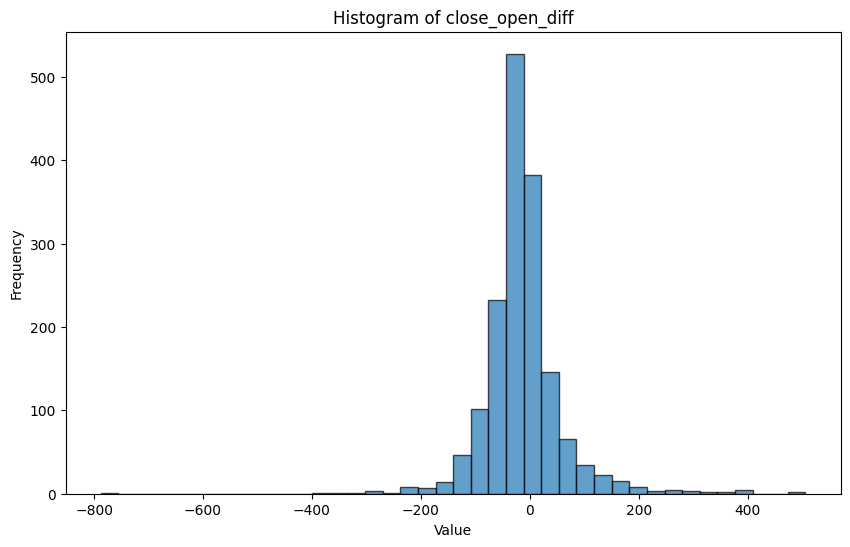

In [16]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(df['close_open_diff'], bins=40, edgecolor='k', alpha=0.7)
plt.title('Histogram of close_open_diff')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [10]:
# FIRST let's do the analysis of 2024 then we will proceed for the other years and will see the results

In [17]:
df_2024 = df[(df['year']==2024)]

In [18]:
df_2024

,Unnamed: 0,high,low,open,close,year,month,day,close_open_diff
1476,2024-01-01,21834.35,21680.85,21727.75,21689.45,2024,1,1,-61.90
1477,2024-01-02,21755.60,21555.65,21751.35,21661.50,2024,1,2,0.40
1478,2024-01-03,21677.00,21500.35,21661.10,21523.70,2024,1,3,-82.10
1479,2024-01-04,21685.65,21564.55,21605.80,21669.60,2024,1,4,-36.15
1480,2024-01-05,21749.60,21629.20,21705.75,21709.55,2024,1,5,-38.05
...,...,...,...,...,...,...,...,...,...
1635,2024-08-22,24867.35,24784.45,24863.40,24810.90,2024,8,22,-34.50
1636,2024-08-23,24858.40,24771.65,24845.40,24831.85,2024,8,23,-74.25
1637,2024-08-26,25043.80,24874.70,24906.10,25011.45,2024,8,26,-13.35
1638,2024-08-27,25073.10,24973.65,25024.80,24997.05,2024,8,27,-33.75


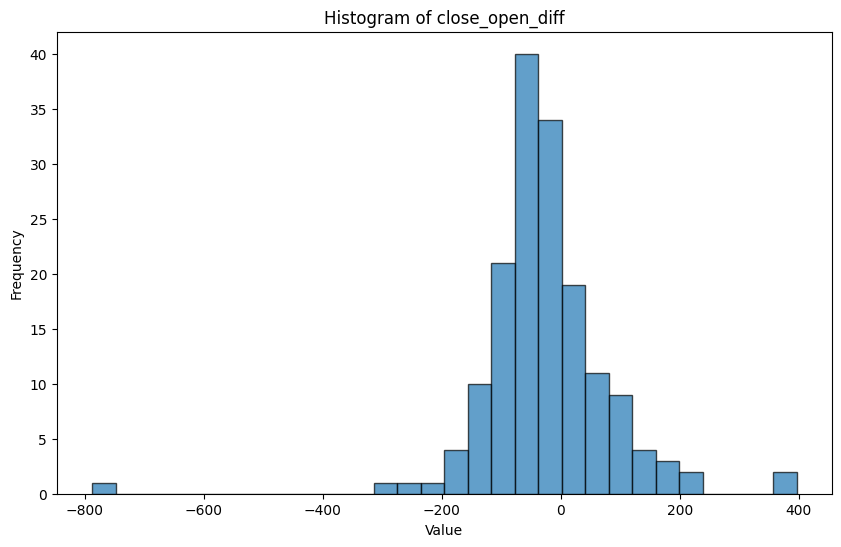

In [19]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(df_2024['close_open_diff'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of close_open_diff')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


<Axes: title={'center': 'Distribution Without Outliers'}, ylabel='Frequency'>

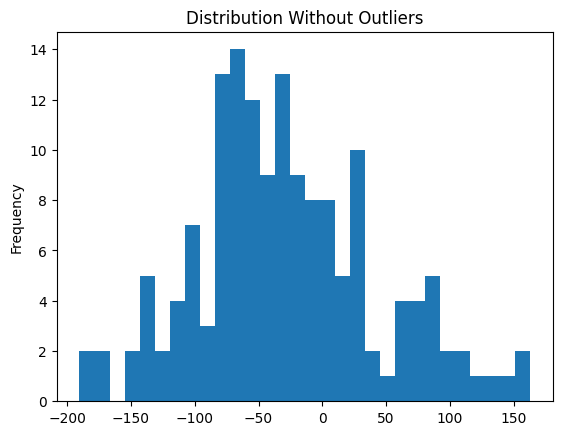

In [20]:
# Define a function to remove outliers based on IQR method
def remove_outliers_iqr(manav, column):
    Q1 = manav[column].quantile(0.25)
    Q3 = manav[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where the column value is within the bounds
    filtered_manav = manav[(manav[column] >= lower_bound) & (manav[column] <= upper_bound)]
    return filtered_manav

# Remove outliers from 'high_open_difference' column
df_filtered = remove_outliers_iqr(df_2024, 'close_open_diff')

# Plot the distribution of the filtered data
df_filtered['close_open_diff'].plot(kind='hist', bins=30, title="Distribution Without Outliers")


In [23]:
# Filter the DataFrame to exclude values between -10 and 10
df_filtered = df_filtered[(df_filtered['close_open_diff'] < -15) | (df_filtered['close_open_diff'] > 10)]


<Axes: title={'center': 'Distribution Without Outliers'}, ylabel='Frequency'>

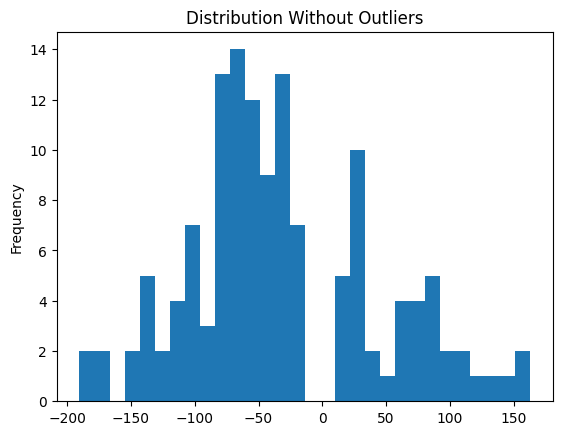

In [24]:
df_filtered['close_open_diff'].plot(kind='hist', bins=30, title="Distribution Without Outliers")

In [ ]:

for index, row in df_5.iterrows():
# Plot candlestick chart
    directory_path = f"{os.getcwd()}/{str(row['year'])}_{str(row['month'])}/"
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    
    # Create a DataFrame with OHLC data for a single day
    ohlc_data = pd.DataFrame({
        'Open': [row['open']],
        'High': [row['high']],
        'Low': [row['low']],
        'Close': [row['close']],
        'Volume': [row['volume']]  # Optional, only if volume is available
    }, index=[pd.Timestamp(f"{row['year']}-{row['month']}-{row['day']}")])
    

    mpf.plot(ohlc_data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price', savefig=os.path.join(directory_path,str(row['day'])))